### Postest 7

#### Link data set : https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

### Import Libary

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil

In [7]:
path = 'Downloads/satellite/data'

In [8]:
import os

In [9]:
kategori = os.listdir(path)
kategori

['cloudy', 'desert', 'green_area', 'water']

In [10]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [11]:
path_gambar = 'Downloads/satellite/data/cloudy/train_10021.jpg'

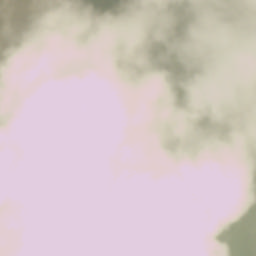

In [12]:
image = load_img(path_gambar)
image

In [13]:
bright = random_brightness(image,max_delta=5)

### Gambar sebelum augmentasi

Text(0.5, 1.0, 'gambar sebelum augmentasi')

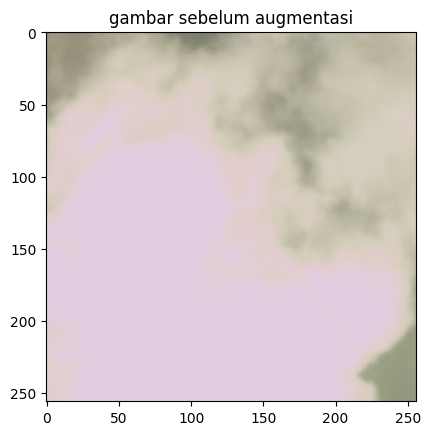

In [14]:
plt.imshow(image)
plt.title('gambar sebelum augmentasi')

### Gambar setelah augmentasi

Text(0.5, 1.0, 'gambar setelah augmentasi')

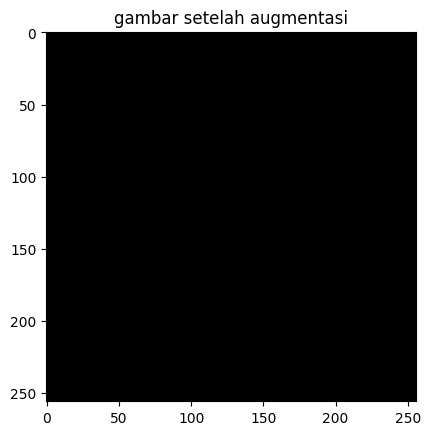

In [15]:
plt.imshow(bright.numpy().astype('uint8'))
plt.title('gambar setelah augmentasi')

# Image Data Generator

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    shear_range = 0.1,
    width_shift_range = 0.5,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,

    validation_split = 0.2

)
val_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)

In [17]:
train_dataset = train_datagen.flow_from_directory(
    path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)
validation_dataset = val_datagen.flow_from_directory(
    path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 4507 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [18]:
train_dataset.class_indices

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

# model sequential

In [19]:
model = Sequential([
    Conv2D(32,(3,3),padding = 'same', activation = 'relu',input_shape = (150,150,3)),
    MaxPooling2D(2),

    Conv2D(32,(3,3),padding = 'same', activation = 'relu'),
    MaxPooling2D(2),

     Conv2D(32,(3,3),padding = 'same', activation = 'relu'),
    MaxPooling2D(2),

     Conv2D(32,(3,3),padding = 'same', activation = 'relu'),
    MaxPooling2D(2),

    Flatten(),

    Dense(64 , activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(6, activation = 'softmax')

])


In [20]:
model.compile (optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split dataset menjadi train dan validation (80% train, 20% validation)
)

In [23]:
train_generator = train_datagen.flow_from_directory(
    'Downloads/satellite/data',  
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Gunakan subset 'training' untuk data train
)

Found 4507 images belonging to 4 classes.


In [24]:
validation_generator = train_datagen.flow_from_directory(
    'Downloads/satellite/data',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Gunakan subset 'validation' untuk data validation
)

Found 1126 images belonging to 4 classes.


In [26]:
# Membangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Jumlah kelas Anda (misalnya, 4 kelas: cloudy, forest, dll.)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [28]:
# Pelatihan model dengan callback EarlyStopping dan ModelCheckpoint
es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator), callbacks=[es, mc])

Epoch 1/10
141/141 [==============================] - ETA: 0s - loss: 0.6015 - accuracy: 0.6856

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - 104s 732ms/step - loss: 0.6015 - accuracy: 0.6856 - val_loss: 0.4507 - val_accuracy: 0.8304
Epoch 2/10
141/141 [==============================] - 119s 842ms/step - loss: 0.4377 - accuracy: 0.8019 - val_loss: 0.3964 - val_accuracy: 0.8446
Epoch 3/10
141/141 [==============================] - 125s 884ms/step - loss: 0.3733 - accuracy: 0.8493 - val_loss: 0.3574 - val_accuracy: 0.8570
Epoch 4/10
141/141 [==============================] - 117s 829ms/step - loss: 0.3343 - accuracy: 0.8673 - val_loss: 0.4465 - val_accuracy: 0.8171
Epoch 5/10
141/141 [==============================] - 117s 830ms/step - loss: 0.3120 - accuracy: 0.8802 - val_loss: 0.2735 - val_accuracy: 0.8828
Epoch 6/10
141/141 [==============================] - 138s 976ms/step - loss: 0.2921 - accuracy: 0.8846 - val_loss: 0.2726 - val_accuracy: 0.8979
Epoch 7/10
141/141 [==============================] - 159s 1s/step - loss: 0.2619 - accuracy: 0.9004 - val_loss: 0.3264 - val_accuracy:

In [30]:
# Evaluasi model terhadap data test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('Downloads/satellite/data', target_size=(150, 150), batch_size=32, class_mode='categorical')

test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 5633 images belonging to 4 classes.
177/177 [==============================] - 22s 125ms/step - loss: 0.2338 - accuracy: 0.9091
Test Loss: 0.2338021993637085
Test Accuracy: 0.9091070294380188


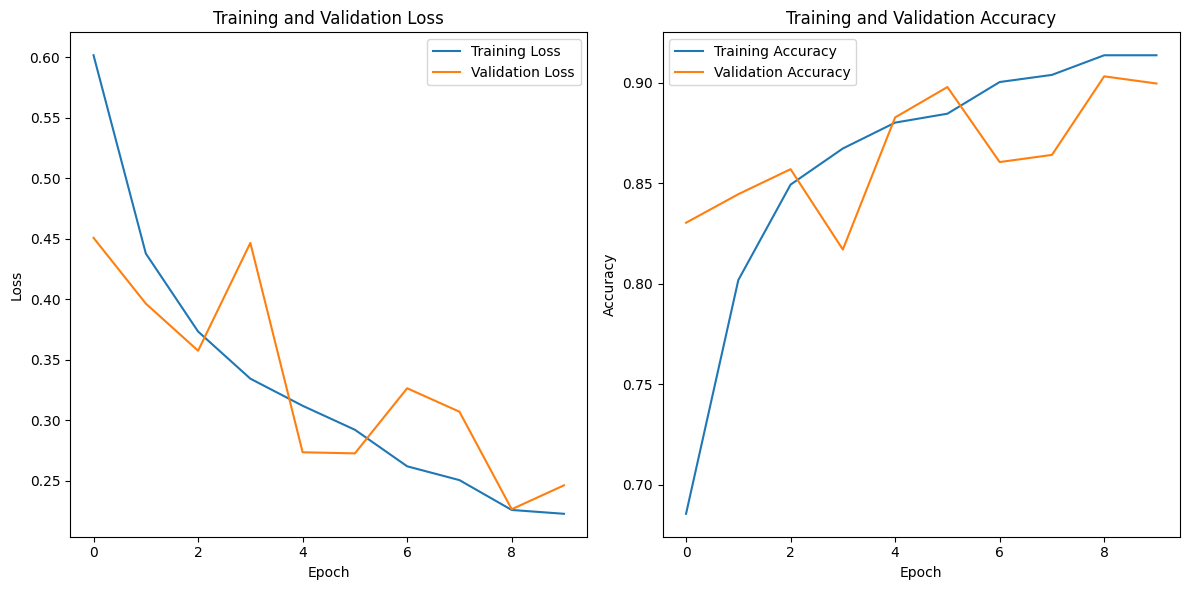

In [31]:
# Plot model loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot model accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()